# Heart Disease prediction ML

Data acquired from Kaggle


## 1. Data verification and EDA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     

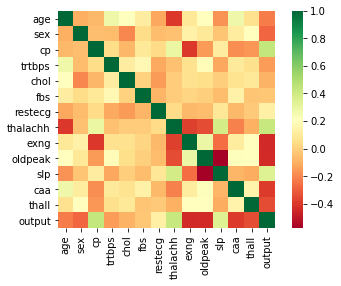

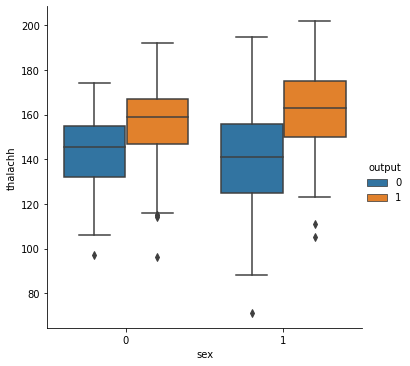

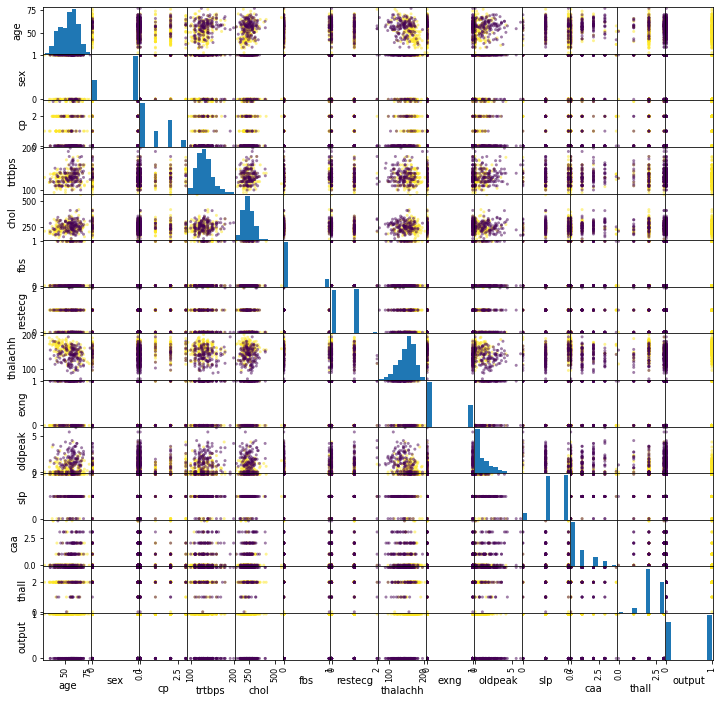

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('heart.csv')

print(df.info())
print("\n")

print(df.head())

print("\n")
count_total = df['output'].count()
count_number_cardiac_df = df[df['output'] == 1].count()
count_number_cardiac = count_number_cardiac_df[-1]

print('Of the ' + str(count_total) + ' patients ' +  str(count_number_cardiac) + ' (' + str(count_number_cardiac / count_total) + ') ' ' are prone to a cardiac event')

print("\n")


print(df.corr())

print("\n")

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()
print("\n")
sns.catplot(kind='box', data=df, y='thalachh',x='sex', hue='output')
plt.show()
print("\n")
pd.plotting.scatter_matrix(df, figsize = [12, 12], c=df['output'])
plt.show()

## 2. Investigating Dtypes and changing them to the correct ones



In [2]:
print(df.dtypes)

print("\n")

### Checking categorical values and transforming them

df[['cp', 'restecg', 'slp', 'thall']] = df[['cp', 'restecg', 'slp', 'thall']].apply(lambda x: x.astype('category'))


print("\n")

print(df.dtypes)


age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object




age            int64
sex            int64
cp          category
trtbps         int64
chol           int64
fbs            int64
restecg     category
thalachh       int64
exng           int64
oldpeak      float64
slp         category
caa            int64
thall       category
output         int64
dtype: object


## Separating into train and test data

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64


   age  sex cp  trtbps  chol  fbs restecg  thalachh  exng  oldpeak slp  caa  \
0   63    1  3     145   233    1       0       150     0      2.3   0    0   
1   37    1  2     130   250    0       1       187     0      3.5   0    0   
2   41    0  1     130   204    0       0       172     0      1.4   2    0   
3   56    1  1     120   236    0       1       178     0      0.8   2    0   
4   57    0  0     120   354    0       1       163     1      0.6   2    0   

  thall  
0     1  
1     2  
2     2  
3     2  
4     2  


age            int64
sex            int64
cp          category
trtbps         int64
chol           int64
fbs            int64
restecg     category
thalachh       int64
exng           int64
oldpeak      float64
slp         category
caa            int64
thall       category
dtype: object


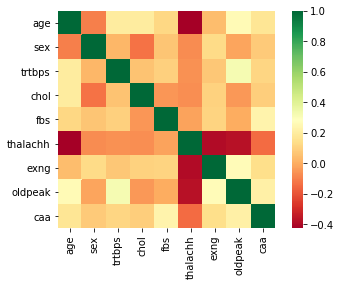

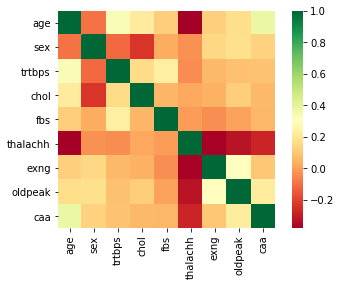



age          53.836066
sex           0.721311
trtbps      131.254098
chol        242.696721
fbs           0.155738
thalachh    150.081967
exng          0.303279
oldpeak       1.068852
caa           0.860656
dtype: float64
age          55.0
sex           1.0
trtbps      130.0
chol        238.0
fbs           0.0
thalachh    152.0
exng          0.0
oldpeak       0.6
caa           0.0
dtype: float64


age          54.723757
sex           0.657459
trtbps      131.872928
chol        248.668508
fbs           0.143646
thalachh    149.353591
exng          0.342541
oldpeak       1.019890
caa           0.640884
dtype: float64
age          56.0
sex           1.0
trtbps      130.0
chol        245.0
fbs           0.0
thalachh    154.0
exng          0.0
oldpeak       0.8
caa           0.0
dtype: float64


In [3]:
from sklearn.model_selection import train_test_split

### Separating labels and output
y = df.iloc[:,-1]
X = df.iloc[:,0:-1]

print(y.head())
print("\n")
print(X.head())
print("\n")

### Separating into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


print(X_train.dtypes)

### Checking values for train and test

sns.heatmap(X_test.corr(), square=True, cmap='RdYlGn')
plt.show()
sns.heatmap(X_train.corr(), square=True, cmap='RdYlGn')
plt.show()
print("\n")

print(X_test.mean())
print(X_test.median())
print("\n")
print(X_train.mean())
print(X_train.median())

### Forming a pipeline, Scaling, Apllying Logistic regression, Gridsearch and cross validation

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

### Initializing pipeline to scale and apply logistic regression
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression())]

pipeline = Pipeline(steps)

#### Indicating hyperparameter space
c_space = np.logspace(-10, 10, 50)
param_grid = {'logreg__C': c_space, 'logreg__penalty': ['l1', 'l2']}
print("\n")

### Trying different combinations of scaling and gridsearch


#### Scaled true, but cv false

logreg_scaled = pipeline.fit(X_train, y_train)
y_pred_scaled = pipeline.predict(X_test)


print('Accuracy with Scaling: {}'.format(logreg_scaled.score(X_test, y_test)))
print('Classification report with Scaling: {}'.format(classification_report(y_test, y_pred_scaled)))
print('Confusion Matrix with Scaling: {}'.format(confusion_matrix(y_test, y_pred_scaled)))
print("\n")
### Scaled tru and cv true

logreg_scaled_cv = GridSearchCV(pipeline, param_grid, cv=10)

logreg_scaled_cv.fit(X_train, y_train)
y_pred_scaledgrid = logreg_scaled_cv.predict(X_test)

print('Accuracy with Scaling and GridSearch: \n {}'.format(logreg_scaled_cv.score(X_test, y_test)))
print('Best score with Scaling and GridSearch: \n {}'.format(logreg_scaled_cv.best_score_))
print(f'Best params: \n {logreg_scaled_cv.best_params_}')
print('Classification report with Scaling: \n {}'.format(classification_report(y_test, y_pred_scaledgrid)))
print('Confusion Matrix with Scaling: \n {}'.format(confusion_matrix(y_test, y_pred_scaledgrid)))
print("\n")

#### Scale false and cv false


logreg_unscaled = LogisticRegression().fit(X_train, y_train)


y_pred_unscaled = logreg_unscaled.predict(X_test)

print('Accuracy without Scaling: {}'.format(logreg_unscaled.score(X_test, y_test)))
print('Confusion Matrix witho Scaling: {}'.format(confusion_matrix(y_test, y_pred_unscaled)))




Accuracy with Scaling: 0.8442622950819673
Classification report with Scaling:               precision    recall  f1-score   support

           0       0.81      0.83      0.82        52
           1       0.87      0.86      0.86        70

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.84      0.84      0.84       122

Confusion Matrix with Scaling: [[43  9]
 [10 60]]


Accuracy with Scaling and GridSearch: 
 0.8524590163934426
Best score with Scaling and GridSearch: 
 0.8453216374269006
Best params: 
 {'logreg__C': 0.014563484775012445, 'logreg__penalty': 'l2'}
Classification report with Scaling: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82        52
           1       0.86      0.89      0.87        70

    accuracy                           0.85       122
   macro avg       0.85      0.85      0.85       122
weighted avg       0.85      0.85  